# Etats des électrons libres dans un édifice 3D

## Position du problème
Les électrons sont dits libres au sens où ils n'interagissent ni entre eux, ni avec les noyaux du système. 
Tout se passe comme si l'édifice qu'ils occupent étaient une enceinte fermée et vide; 
Le problème s'écrit alors :

$$
\frac{-\hbar^2}{2m} \Delta \psi + V \psi = \mathcal{E}\psi
$$

avec

$$
\left\{
\begin{align}
V (\vec{r}\in \mathrm{\acute{e}difice}) &= 0\\
    V (\vec{r}\notin \mathrm{\acute{e}difice}) &\rightarrow \infty
\end{align}
\right.
$$

Par sa forme infiniment profonde, ce potentiel est usuellement désigné comme un _puits de potentiel_.
Sans erte de généralité, on considérera un édifice parallélépipédique de volume $V = L_x L_y L_z$.

## Calcul des solutions
On cherche des solutions de la forme:

$$ \psi (x,y,z) = \psi_x(x) \psi_y(y) \psi_z(z)$$

L'équation de Schrödinger peut alors être séparée en 3 équations indépendnantes correspondant à chacune des 3 directions de l'espace :

$$
\frac{\hbar^2}{2m} \frac{\partial ^2 \psi_\alpha}{\partial \alpha^2} + \mathcal{E}_\alpha \psi_\alpha,
\quad \alpha = x,y,z .
$$

Ces équations admettent des solutions de la forme :

$$
\psi_\alpha (\alpha) = A e^{ik_\alpha \alpha} + B e^{-ik_\alpha \alpha},
\quad A, B \in \mathbb{C},\, \forall \alpha \in [0,L_\alpha]
$$

La condition au premier bord ($\psi_\alpha (0) = 0$) impose $A + B =0$.
Il s'ensuit que la condition au second bord ($\psi_\alpha (L_\alpha) = 0$) s'exprime :

$$
A (e^{ik_\alpha L_\alpha} - e^{-ik_\alpha L_\alpha}) = 0 \quad
    \Rightarrow \quad A \sin (k_\alpha L_\alpha) = 0 \quad
    \Rightarrow \quad 
    k_\alpha = n_\alpha \pi / L_\alpha,\, n_\alpha \in \mathbb {N}^*
$$

Les $k_\alpha$ représentent les nombres d'onde ($k \equiv 2\pi/\lambda$) dans les directions $\alpha = x,y,z$, c'est-à-dire les composantes du vecteur d'onde représentant l'électron libre décrit par la solution $\psi$.

Finalement, les solutions de l'équation du mouvement des électrons libres s'expriment :

$$
\psi (\vec{r}) = ABC \sin (\frac{n_x\pi}{L_x}x) \sin (\frac{n_y\pi}{L_y}y) \sin (\frac{n_z\pi}{L_z}z)
$$

avec $ABC = \sqrt {8/V}$ afin de respecter l'unicité de l'électron décrit par $\psi$ dans l'édifice : $\int_\mathrm{\acute{e}difice}\psi (\vec{r}) \psi^* (\vec{r}) d^3\tau = 1$.

Dans un édifice 1D, les solutions de l'équation de Schrödinger stationnaires sont analogues aux modes de vibration d'une corde de guitare.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
nrows = 4
fig, ax = plt.subplots (nrows = nrows, ncols = 1, figsize = (5,6))
x = np.linspace (0,1)
for i in range (nrows):
    ax [i].plot (x, np.sin ((i+1) * np.pi * x),  color = f'C{i:d}')
    ax [i].text (0.92, 0.87,f'n = {i+1:d}', color = f'C{i:d}')
    
    # use set_position
    
    ax [i].spines ['top'].set_color ('none')
    ax [i].spines ['left'].set_position ('zero')
    ax [i].spines ['right'].set_color ('none')
    ax [i].spines ['bottom'].set_position ('zero')
    ax [i].set_ylim ((-1,1))
    ax [i].set_ylabel (r'$\psi$'+f'{i+1:d} (x)')
            

ax [nrows-1].set_xlabel ('x/L_x')
ax [nrows-1].xaxis.set_label_coords(0.5, -0.05)
ax [0].set_title (f"Allure des {nrows:d} premières fonctions d'onde de l'électron libre (1D)")


plt.tight_layout ()
plt.show ()

<Figure size 500x600 with 4 Axes>

Les états accessibles aux électrons libres dans le puits de potentiel sont donc définis par l'ensemble des fonctions d'ondes solutions de l'équation de Schrödinger.
Chacun de ces états se distingue par son vecteur d'onde $\vec{k}$.
Ces vecteurs d'onde pointent vers des positions ponctuelles constituant un réseau régulier dans l'espace réciproque.


/usr/lib/python3/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


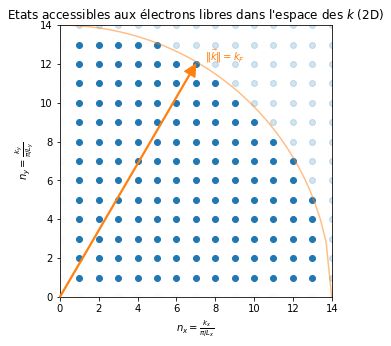

In [37]:
# espace des $k$ à 2 dimensions
fig, ax = plt.subplots (nrows = 1, ncols = 1, figsize = (5,5))

n, m = 14,14
col = 'C0'

for y in range (n+1):
    for x in range (m+1):
        if x*y == 0:
            ax.plot (x, y, marker = 'o', color = col, markersize = 8, alpha = 0.02)
        else:
            if x*x + y*y > m*n:
                ax.plot (x, y, marker = 'o', color = col, markersize = 6, alpha = 0.2)
            else:
                ax.plot (x, y, marker = 'o', color = col, markersize = 6)
x = np.linspace (0, m)
ax.plot (x, np.sqrt (m*m-x*x), color = 'C1', alpha = 0.5)
ax.set_aspect (1)
ax.set_xlabel (r'$n_x =  \frac{k_x}{\pi/L_x}$')
ax.set_ylabel (r'$n_y =  \frac{k_y}{\pi/L_y}$')

ax.annotate (s = '', xy = (7,12), xytext = (0,0),
            arrowprops = dict (facecolor = 'C1', edgecolor = 'C1', width = 1.2))
ax.text (7.5,12.2, r'$\Vert\vec{k}\Vert = k_F$', color = 'C1')

ax.set_title ("Etats accessibles aux électrons libres dans l\'espace des $k$ (2D)")

ax.set_xlim (0,m)
ax.set_ylim (0,n)
plt.show ()